In [45]:
import pandas as pd
def get_ts(df):
    ts = df.reset_index()[['Date', 'Close']]
    ts.columns = ['ds', 'y']
    ts['ds'] = pd.to_datetime(ts['ds'])
    return ts
new_data = pd.read_csv('/home/lez/Documents/QT/QT/data/BILI.csv')
new_data = get_ts(new_data)
# select 0.5 as trainset
sp = int(0.5*(len(new_data)))
train = new_data.iloc[:sp]
val = new_data.iloc[sp:]

In [46]:
x_train  = train[['ds']]
y_train = train[['y']]

In [ ]:
import pandas as pd
import numpy as np

# 导入 keras 等相关包
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)


In [53]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(x_train)
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [56]:
y_train.shape

(590,)

In [49]:
train.columns=['Date','Close Price']

In [ ]:
import pandas as pd
import numpy as np

# 导入 keras 等相关包
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

# 选取 date 和 close 两列
# data = df.sort_index(ascending=True, axis=0)
# new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close Price'])
# for i in range(0,len(data)):
#     new_data['Date'][i] = data['Date'][i]
#     new_data['Close Price'][i] = data['Close Price'][i]
new_data = train

# setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

# 分成 train and test
dataset = new_data.values

train = dataset[0:200,:]
test = dataset[200:,:]

# 构造 x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1)) #(590, 60, 1)

# 建立 LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

inputs = new_data[len(new_data) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)


In [43]:
x_train.shape

(140, 60, 1)

In [41]:

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

#for plotting
train = new_data[:700]
test = new_data[700:]
test['Predictions'] = closing_price
plt.plot(train['Close Price'])
plt.plot(test[['Close Price','Predictions']])

IndexError: tuple index out of range

2023-05-30 21:07:53.935720: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-30 21:07:53.936693: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-30 21:07:53.937475: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

25/25 [==============================] - 0s 1ms/step


2023-05-30 21:08:10.969561: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-30 21:08:10.970661: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-30 21:08:10.971474: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Train Score: 2.70 RMSE
Test Score: 22.29 RMSE


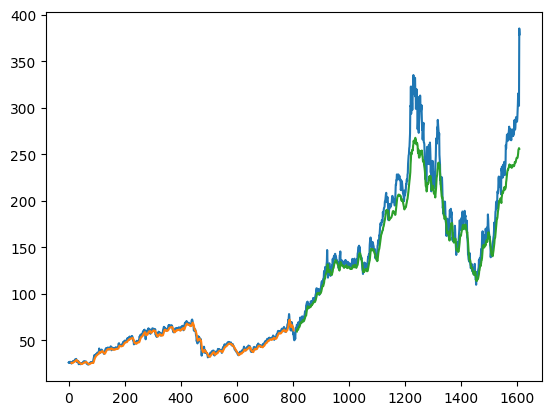

In [70]:
# LSTM for international airline passengers problem with time step regression framing
# https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	predict = 1
	for i in range(len(dataset)-look_back-predict):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back+predict, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('/home/lez/Documents/QT/QT/data/NVDA.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.5)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 10

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=0)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [2]:
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.5)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 15
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [2]:
testX2, testY2 = create_dataset(test[:12,:], look_back)
print(testX2.shape)
testX2 = np.reshape(testX2, (testX2.shape[0], testX2.shape[1], 1))
print(testX2.shape)

(1, 20)
(1, 20, 1)


In [57]:
testPredict = model.predict(testX2)

1/1 [==============================] - 0s 13ms/step


In [60]:
testX2.copy()[:,1:].shape

(1, 14, 1)

In [59]:
testPredict

array([[0.10717227]], dtype=float32)

In [4]:
len(testX)

785

In [71]:
testX2, testY2 = create_dataset(test[:12,:], look_back)
inputX = testX2.copy() #(1,20)

all_pred = []
for _ in range(30):
    # predict next value and use it as next input
    inputX = np.reshape(inputX, (testX2.shape[0], testX2.shape[1], 1))
    pred = model.predict(inputX) #(1,1)
    all_pred.append(pred)
    pred = np.reshape(pred, (1,1,1))
    inputX = np.append(inputX, pred) #(1,21)
    inputX = inputX[1:] #(1,20)
    # print(inputX)


    # testX2 = np.reshape(testX2, (testX2.shape[0], testX2.shape[1], 1))
    # testPredict = model.predict(testX2)
    # testX2 = np.append(testX2, testPredict[-1])
    # testX2 = testX2[1:]
    # print(testPredict)

1/1 [==============================] - 0s 11ms/step


In [32]:
all_pred = np.array(all_pred)

res = scaler.inverse_transform(all_pred.reshape(-1,1))

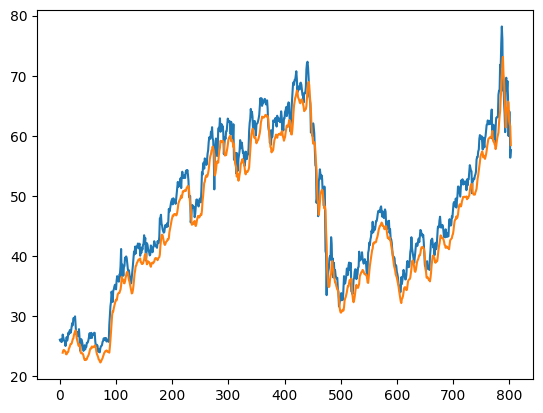

In [47]:
plt.plot(scaler.inverse_transform(dataset)[:804])
plt.plot(trainPredictPlot[:804])
# plt.plot(testPredictPlot[:804])

plt.show()

In [72]:
fit1 = np.append(trainPredictPlot[:804],res)
real = np.append(scaler.inverse_transform(dataset)[:804],testY.T[:30])

In [68]:
import matplotlib.pyplot as plt
plt.title('Predicted vs Real Stock Price')

AttributeError: module 'matplotlib.pyplot' has no attribute 'title'

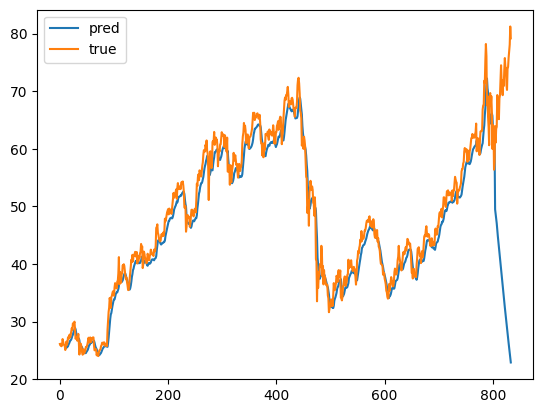

In [73]:
plt.plot(fit1, label='pred')
plt.plot(real, label='true')
# plt.title('NVDA')
plt.legend()